# **Predicting Thyroid Cancer Risk Using Artificial Neural Networks**

In [18]:

#import libraries
import numpy as np
import pandas as pd
import tensorflow as tf

In [19]:
from google.colab import files
uploaded = files.upload()

Saving Thyroid_cancer_risk_dataset.csv to Thyroid_cancer_risk_dataset (3).csv


In [20]:

#importing dataset
dataset = pd.read_csv('Thyroid_cancer_risk_dataset.csv')

In [21]:
#partial view of dataset from top
dataset.head()

,Age,Gender,Family_History,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,66,Male,No,9.37,1.67,6.16,1.08,Low,Benign
1,29,Male,No,1.83,1.73,10.54,4.05,Low,Benign
2,86,Male,No,6.26,2.59,10.57,4.61,Low,Benign
3,75,Female,No,4.10,2.62,11.04,2.46,Medium,Benign
4,35,Female,Yes,9.10,2.11,10.71,2.11,High,Benign


In [22]:
#partial view of dataset from bottom
dataset.tail()

,Age,Gender,Family_History,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
4995,82,Female,No,5.34,3.38,7.07,2.37,Low,Benign
4996,39,Male,Yes,9.12,0.91,7.23,4.59,Low,Malignant
4997,26,Male,Yes,8.75,2.21,6.05,1.19,Low,Benign
4998,40,Female,No,6.71,1.18,7.47,0.39,High,Benign
4999,26,Female,Yes,3.77,3.28,7.21,3.22,High,Malignant


In [23]:
#basic dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   Gender               5000 non-null   object 
 2   Family_History       5000 non-null   object 
 3   TSH_Level            5000 non-null   float64
 4   T3_Level             5000 non-null   float64
 5   T4_Level             5000 non-null   float64
 6   Nodule_Size          5000 non-null   float64
 7   Thyroid_Cancer_Risk  5000 non-null   object 
 8   Diagnosis            5000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 351.7+ KB


In [24]:
#dimention of the dataset
dataset.shape

(5000, 9)

In [25]:

#basic statistics symmary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,51.809800,21.525954,15.0,33.0000,52.00,71.00,89.0
TSH_Level,5000.0,5.037822,2.817146,0.1,2.6600,5.02,7.48,10.0
T3_Level,5000.0,1.982622,0.863409,0.5,1.2375,1.99,2.73,3.5
T4_Level,5000.0,8.305088,2.182998,4.5,6.4000,8.38,10.19,12.0
Nodule_Size,5000.0,2.474122,1.462358,0.0,1.1900,2.50,3.74,5.0


                  Age  TSH_Level  T3_Level  T4_Level  Nodule_Size
Age          1.000000  -0.003481 -0.004552 -0.001071     0.014296
TSH_Level   -0.003481   1.000000  0.018896  0.009571    -0.009721
T3_Level    -0.004552   0.018896  1.000000  0.002388    -0.004276
T4_Level    -0.001071   0.009571  0.002388  1.000000     0.001834
Nodule_Size  0.014296  -0.009721 -0.004276  0.001834     1.000000


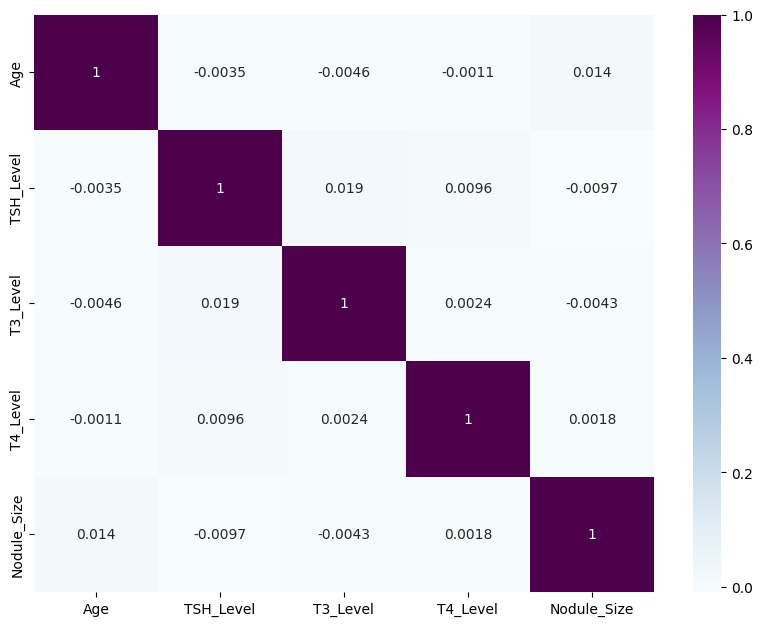

In [26]:
#finding correlation between the features
import seaborn as sns
import matplotlib.pyplot as plt
corr_var=dataset.corr(numeric_only=True) # added numeric_only=True
print(corr_var)
plt.figure(figsize=(10,7.5)) #matplotlib.pyplot is now imported as plt
sns.heatmap(corr_var, annot=True, cmap='BuPu') #seaborn is now imported as sns
plt.show()



In [27]:
import pandas as pd

dataset = pd.read_csv('Thyroid_cancer_risk_dataset.csv')

# Features and target
X = dataset.iloc[:, :-1].values  # All columns except the last one
y = dataset.iloc[:, -1].values   # Last column (Diagnosis)


In [28]:
#independent features
print(X)

[[66 'Male' 'No' ... 6.16 1.08 'Low']
 [29 'Male' 'No' ... 10.54 4.05 'Low']
 [86 'Male' 'No' ... 10.57 4.61 'Low']
 ...
 [26 'Male' 'Yes' ... 6.05 1.19 'Low']
 [40 'Female' 'No' ... 7.47 0.39 'High']
 [26 'Female' 'Yes' ... 7.21 3.22 'High']]


In [29]:
#dependent features
print(y)

['Benign' 'Benign' 'Benign' ... 'Benign' 'Benign' 'Malignant']


In [30]:
#as we have two columns as categorical terms we go for encoding we need to convert to numericals
#Categorical encoding

#gender will have some correlation with other feature so we go for label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#gender column in index 1
X[:, 1] = le.fit_transform(X[:, 1])

# Family_History column in index 2
X[:, 2] = le.fit_transform(X[:, 2])


In [31]:
print(X)

[[66 1 0 ... 6.16 1.08 'Low']
 [29 1 0 ... 10.54 4.05 'Low']
 [86 1 0 ... 10.57 4.61 'Low']
 ...
 [26 1 1 ... 6.05 1.19 'Low']
 [40 0 0 ... 7.47 0.39 'High']
 [26 0 1 ... 7.21 3.22 'High']]


In [32]:
from sklearn.preprocessing import OrdinalEncoder

# Assuming your array X is as before, with 'Thyroid_Cancer_Risk' as the last column
encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])

# Extract just the last column (Thyroid_Cancer_Risk) and transform it
encoded_risk = encoder.fit_transform(X[:, -1].reshape(-1, 1))

# Assign the transformed (encoded) values back to the last column
X[:, -1] = encoded_risk.flatten().astype(int)  # Use flatten() to convert to 1D array and convert to int


In [33]:
print(X)

[[66 1 0 ... 6.16 1.08 0]
 [29 1 0 ... 10.54 4.05 0]
 [86 1 0 ... 10.57 4.61 0]
 ...
 [26 1 1 ... 6.05 1.19 0]
 [40 0 0 ... 7.47 0.39 2]
 [26 0 1 ... 7.21 3.22 2]]


In [34]:
#training and testing split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [35]:
#feature scaling is an important and mandatory for ann process before modelling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:

#ANN - initializing
ann = tf.keras.models.Sequential()

In [37]:

#input layer
# 8 features
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

In [38]:

#hidden layer
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))


In [39]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
le = LabelEncoder()

# Convert y_train into numerical values (0 or 1)
y_train = le.fit_transform(y_train)

# Check the result
print(y_train)  # Now it should print an array of 0s and 1s, not strings



[0 0 0 ... 0 0 0]


In [40]:

#output layer
#as target value is binary - AF
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [41]:
#compiling
#loss - target is binary
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [42]:
#training set
ann.fit(X_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7622 - loss: 0.5792
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7578 - loss: 0.5204
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7538 - loss: 0.5242
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7563 - loss: 0.5028
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7602 - loss: 0.4940
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7768 - loss: 0.4928
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8005 - loss: 0.4914
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8116 - loss: 0.4762
Epoch 9/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8078 - loss: 0.4870
Epoch 10/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8186 - loss: 0.4733
Epoch 11/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8251 - loss: 0.4625
Epoch 12/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [43]:
# Convert y_test to numeric values (0 and 1) using LabelEncoder
y_test = le.transform(y_test)

# Now you can perform the prediction and accuracy calculation
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)  # Apply threshold to get 0 or 1

# Convert y_pred to integers (0 or 1) for consistency with y_test
y_pred = y_pred.astype(int)

# Check the output
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis=1))

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 1]
 [0 0]]


In [44]:
# Confusion Matrix and Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[[1062   67]
 [ 217  154]]
Accuracy: 0.8106666666666666


In [45]:
#for predicting single sample
print(ann.predict(sc.transform([[89, 0, 1, 4.7, 0.62, 11.73, 0.01, 2]])) > 0.5)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[ True]]
